本文摘录了大量 `机器学习算法原理与编程实践_郑捷著_电子工业出版社` 的原文。
源码：[机器学习算法原理与编程实践](https://github.com/wenbo/MLBook)

# 中文分词——`jieba`

In [1]:
import jieba


seg_list = jieba.cut("来到北京清华大学", cut_all=False)
print("Default Mode:", "/ ".join(seg_list))  # 默认模式

seg_list = jieba.cut("他来到网易杭研大厦")
print(" ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\q7356\AppData\Local\Temp\jieba.cache
Loading model cost 1.337 seconds.
Prefix dict has been built succesfully.


Default Mode: 来到/ 北京/ 清华大学
他 来到 网易 杭研 大厦


# 数据表文件的读取

In [49]:
import os
import numpy as np
import pandas as pd


class Tables:
    '''
    读取和处理数据表
    '''
    
    def __init__(self, root):
        self.root = root
        
    def readfilelines(self, path, nmax = 0):
        '''
        按行读文件，读取指定行数
        nmax=0 按行读取全部
        '''
        with open(self.root + path, 'rb') as fp:
            ncount = 0 # 已读取行
            while True:
                content = fp.readline()
                # 判断是否到文件尾，是否读取到
                if content == "" or (ncount >= nmax and nmax != 0):
                    break
                yield content   # 返回读取的行
                if nmax != 0 : 
                    ncount += 1
                    
    def tostring(self, path, nmax):
        for line in T.readfilelines(path, nmax):
            yield line.strip().decode()
            
    def file2matrix(self, path, delimiter):
        '''
        数据文件转矩阵

        参数
        ======
        path::数据文件路径
        delimiter::文件分隔符
        '''
        recordlist = []
        with open(path, 'rb') as fp: # 读取文件内容
            content = fp.read()
            rowlist = content.splitlines()   # 按行转换为一维表
            # 逐行遍历
            # 结果按分隔符分割为行向量
            recordlist =[row.split(delimiter) for row in rowlist if row.strip()]
        return mat(recordlist)  # 返回转换后的矩阵形式

In [36]:
root = 'D:/MLBook'
T = Tables(root)

In [37]:
# 读取 10 行
path = "/chapter01/testdata/01.txt" # 数据文件所在路径
for line in T.tostring(path, 10):
    print(line)

香菜	2.80	4.00	4.00	4.00	2.20	山西汾阳市晋阳农副产品批发市场	山西	汾阳
大葱	2.80	2.80	2.80	2.80	2.60	山西汾阳市晋阳农副产品批发市场	山西	汾阳
葱头	1.60	1.60	1.60	1.60	1.60	山西汾阳市晋阳农副产品批发市场	山西	汾阳
大蒜	3.60	3.60	3.60	3.60	3.00	山西汾阳市晋阳农副产品批发市场	山西	汾阳
蒜苔	6.20	6.40	6.40	6.40	5.20	山西汾阳市晋阳农副产品批发市场	山西	汾阳
韭菜	5.60	5.60	5.60	5.60	4.60	山西汾阳市晋阳农副产品批发市场	山西	汾阳
青椒	5.20	5.00	5.00	5.00	4.80	山西汾阳市晋阳农副产品批发市场	山西	汾阳
茄子	5.40	4.40	4.40	4.40	5.40	山西汾阳市晋阳农副产品批发市场	山西	汾阳
西红柿	4.80	5.00	5.00	5.00	5.00	山西汾阳市晋阳农副产品批发市场	山西	汾阳
黄瓜	3.40	4.00	4.00	4.00	2.60	山西汾阳市晋阳农副产品批发市场	山西	汾阳


In [130]:
class File2Table:
    def __init__(self, root):
        self.root = root
    
    def file2matrix(self, path, delimiter):
        '''
        数据文件转矩阵

        参数
        ======
        path::数据文件路径
        delimiter::文件分隔符
        '''
        recordlist = []
        with open(path, 'rb') as fp: # 读取文件内容
            content = fp.read().decode()
            rowlist = content.splitlines()   # 按行转换为一维表
            # 逐行遍历
            # 结果按分隔符分割为行向量
            recordlist =[row.split(delimiter) for row in rowlist if row.strip()]
        return np.mat(recordlist)  # 返回转换后的矩阵形式
            
    def to_pandas(self, delimiter):
        '''
        获取 root 下的所有数据表文件，并转换为 pandas.DataFrame
        '''
        pathlist = os.listdir(self.root) # 获取 root 下所有数据文件
        for path in pathlist:
            recordmat = self.file2matrix(self.root + "/" + path, delimiter)  # 文件到矩阵的转换
            yield pd.DataFrame(recordmat)

In [131]:
root1 = root + "/chapter01/testdata" # 数据文件所在路径
FM = File2Table(root1)

In [138]:
pathlist = os.listdir(root1)
path = root1 + "/" + pathlist[0]
m = FM.file2matrix(path, '\t')[:6]
m

matrix([['香菜', '2.80', '4.00', '4.00', '4.00', '2.20', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳'],
        ['大葱', '2.80', '2.80', '2.80', '2.80', '2.60', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳'],
        ['葱头', '1.60', '1.60', '1.60', '1.60', '1.60', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳'],
        ['大蒜', '3.60', '3.60', '3.60', '3.60', '3.00', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳'],
        ['蒜苔', '6.20', '6.40', '6.40', '6.40', '5.20', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳'],
        ['韭菜', '5.60', '5.60', '5.60', '5.60', '4.60', '山西汾阳市晋阳农副产品批发市场',
         '山西', '汾阳']],
       dtype='<U28')

In [136]:
for p in FM.to_pandas('\t'):
    break

In [137]:
p.head()

,0,1,2,3,4,5,6,7,8
0,香菜,2.80,4.00,4.00,4.00,2.20,山西汾阳市晋阳农副产品批发市场,山西,汾阳
1,大葱,2.80,2.80,2.80,2.80,2.60,山西汾阳市晋阳农副产品批发市场,山西,汾阳
2,葱头,1.60,1.60,1.60,1.60,1.60,山西汾阳市晋阳农副产品批发市场,山西,汾阳
3,大蒜,3.60,3.60,3.60,3.60,3.00,山西汾阳市晋阳农副产品批发市场,山西,汾阳
4,蒜苔,6.20,6.40,6.40,6.40,5.20,山西汾阳市晋阳农副产品批发市场,山西,汾阳


# `pickle` 的使用

In [142]:
import pickle

In [140]:
root1

'D:/MLBook/chapter01/testdata'

## 将数据写入磁盘

In [148]:
with open(root1 + "/recordmat.dat", "wb") as file_obj:
    pickle.dump(p, file_obj) 

## 将数据载入内存

In [149]:
with open(root1 + "/recordmat.dat", "rb") as read_obj:
    readmat = pickle.load(read_obj)
print(readmat.shape)

(4103, 9)


# 可视化

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


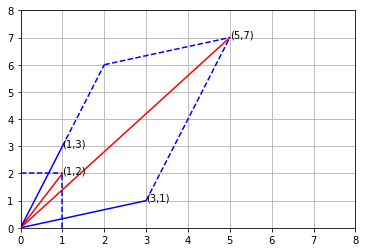

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
x0 = linspace(0,1,200)
y0 = 2*x0
x1 = linspace(0,1,200)
y1 = 3*x1
x2 = linspace(0,3,200)
y2 = x2/3 
x3 = linspace(0,5,200)
y3 = 7*x3/5
ax.plot(x0,y0,"r")
plt.annotate("(1,2)",xy = (1,2))	
ax.plot(x1,y1,"b")
plt.annotate("(1,3)",xy = (1,3))	
ax.plot(x2,y2,"b")
plt.annotate("(3,1)",xy = (3,1))	
ax.plot(x3,y3,"r")
plt.annotate("(5,7)",xy = (5,7))	
#平行四边形
x7 = linspace(0,1,200)
y7 = linspace(2,2,200)
ax.plot(x7,y7,"b",linestyle='--')	
x8 = linspace(1,1,200)
y8 = linspace(0,2,200)
ax.plot(x8,y8,"b",linestyle='--')	
x4 = linspace(1,2,200)
y4 = 3*x4
ax.plot(x4,y4,"b",linestyle='--')	
x5 = linspace(2,5,200)
y5 = 6+x0
ax.plot(x5,y5,"b",linestyle='--')
x6 = linspace(3,5,200)
y6 = 1+6*x0
ax.plot(x6,y6,"b",linestyle='--')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.grid(True)
plt.show()

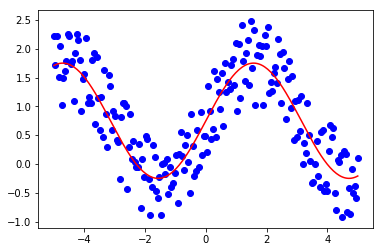

In [159]:
x = np.linspace(-5, 5, 200);
y = np.sin(x);                              # 给出 y 与 x 的基本关系
yn = y + np.random.rand(1,len(y)) * 1.5 ;     # 加入噪声的点集
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(x, yn, c='blue',marker='o')
ax.plot(x, y+0.75, 'r') 
plt.show()

## Net 可视化

[[0.1], [0.9], [0.9], [0.45], [0.9], [0.7], [0.1], [0.45]]
[[0.1], [0.5], [0.1], [0.9], [0.8], [0.9], [0.45], [0.1]]


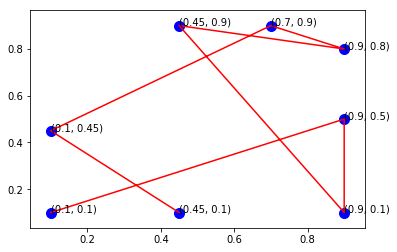

In [166]:
# nodelist = ["city1", "city2", "city3", "city4", "city5", "city6", "city7", "city8"]
dist = np.array([[0.1,0.1], [0.9,0.5], 
               [0.9,0.1], [0.45,0.9],
               [0.9,0.8], [0.7,0.9],
               [0.1,0.45], [0.45,0.1]])
m, n = dist.shape
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.scatter(dist.T[0], dist.T[1], c='blue', marker='o', s=100)
for point in dist.tolist():
    plt.annotate("("+str(point[0])+", "+str(point[1])+")", xy = (point[0],point[1]))
xlist = []
ylist = []
for px,py in zip(dist.T.tolist()[0],dist.T.tolist()[1]):
    xlist.append([px])
    ylist.append([py])
print(xlist)
print(ylist)
ax.plot(xlist, ylist, 'r') 
plt.show()

## 绘制树

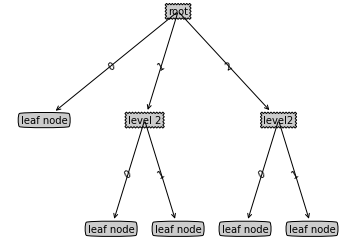

In [3]:
import sys
sys.path.append('E:/xinlib')
import treePlotter as tp 

myTree = {'root': {0: 'leaf node', 1: {'level 2': {0: 'leaf node', 1: 'leaf node'}},2:{'level2': {0: 'leaf node', 1: 'leaf node'}}}}
tp.createPlot(myTree)

# 初识推荐系统

### [wiki](https://zh.wikipedia.org/zh-hans/推薦系統)

推荐系统是一种信息过滤系统，用于预测用户对物品的「评分」或「偏好」。

精彩推荐：
- [《推荐系统实战》- 笔记与思考](https://www.cnblogs.com/buptzym/p/7140639.html)
- [Surprise——Python的推荐系统库（1）](https://blog.csdn.net/qq_26877377/article/details/79980107)

### 存在问题（背景）

- **关键词**的信息量不足，基于关键词的检索在很多情况下不能精准和深刻地反映用户的潜在需求；
- 通用的搜索引擎只有而且必须对用户提供尽量丰富而无差别的信息，这样才能应对不同种类的需求，以及需求的变换。

因此，如何平衡搜索的广度与深度（精准程度）是推荐系统所要解决的主要问题。

推荐系统着眼于**需求**二字：
- 需求的定位；
- 需求的个性化；
- 需求的模糊性衍生。

### 推荐系统的应用

- 把包销售：经常一起购买的产品；
- **协同过滤**：购买了此产品的顾客同时也购买的产品；（除了促销之外，也可以帮助用户定位购买需求）
- 用户的商品评论列表。

推荐系统通过研究用户的兴趣偏好，由智能算法进行个性化的计算，发现用户的潜在兴趣点，从而引导用户发现需求。

### 推荐系统的架构
![](http://static.zybuluo.com/xinet/nv0xlf5fudcw8jzuja1bhcl1/%E6%8D%95%E8%8E%B7.PNG)

![捕获.PNG-233.8kB][1]
![捕获1.PNG-512.6kB][2]


  [1]: http://static.zybuluo.com/xinet/otbwdn2j9meo0b2bks3b4w4u/%E6%8D%95%E8%8E%B7.PNG
  [2]: http://static.zybuluo.com/xinet/0gba1a2zgmrsvwv0w8fccfvt/%E6%8D%95%E8%8E%B71.PNG

前两种方法较为简单，应用也不广泛。

## 协同过滤（Collaborative Filtering，CF）

推荐模型：
- 基于用户的推荐技术：找到具有相似品味的人所喜欢的物品——User CF；
- 基于物品的推荐技术：从一个人喜欢的物品中找出相似的物品——Item CF。

### 数据预处理

![](http://static.zybuluo.com/xinet/aisvgo78hcufm70604oz1b87/%E6%8D%95%E8%8E%B7.PNG)

预处理策略：
- 减噪
- 归一化
- 聚类（缩减计算量）

### 使用 Scikit-Learn 的 KMeans 聚类

![](http://static.zybuluo.com/xinet/0lctfv21ucngkvkarmv2mz91/%E6%8D%95%E8%8E%B7.PNG)

### KMeans 的基本原理
给定要划分的数目 $k$：
- 首先创建一个初始划分，随机选择 $k$ 个对象，每个对象初始地代表了一个聚类中心。对于其他对象，根据其与各个聚类中心的距离，将它们赋给最近的簇。
- 然后采用一种迭代的重定位技术，尝试通过对象在划分的簇之间移动来改进划分，直到聚类中心不发生变化为止。
    - **重定位技术**：就是当有新的对象加入到簇中或已有对象离开簇时，重新计算聚类的平均值（作为聚类中心），然后对对象进行重新分配。